PILAR ARIAS, ÁLVARO GARCÍA CID, YEDRA MARTÍN, AMAYA SARASA

<GRUPO 7>

#INTRODUCCIÓN

En este proyecto se va a proceder a realizar un proyecto de creación de una red neuronal que nos permita solucionar un problema de regresión.

Para tomar el tema sobre el cual va a tratar este proyecto se ha decidido buscar un tema que en la actualidad pueda resultar útil. Por ello, debido al auge de la tecnología en nuestro día a día se ha considerado que un buen problema sería realizar una predicción acerca de la duración de la batería de un móvil, en función de diversos datos.

Se importa keras

In [22]:
import keras
keras.__version__

'2.9.0'

# Prediciendo la duración de la batería de un movil
Vamos a predecir la duración de la batería de un teléfono movil dados algunos datos como los píxeles de la cámara, si tiene o no conexión wifi, la cantidad de cores del procesador, etc. 

El conjunto de datos tiene un total de 2000 datos, que dividiremos entre 1750 de entrenamiento (de los cuales 500 serán para validación) y 250 de test. Las 21 carácaterísticas en los datos de entrada (por ejemplo, si tiene o no v) es una característica que tiene una escala diferente. Por ejemplo, algunos valores son proporciones, que toman valores entre 0 y 1, otros toman valores entre 1 y 12, otros entre 0 y 100 ...



In [23]:
import pandas as pd
datos=pd.read_csv('weatherHistory.csv.zip',encoding='latin-1')
datos.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Comprobamos que se han importado correctamente, los 2000 datos con 21 características. 

In [24]:
datos.shape

(96453, 12)

In [25]:
datos.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
for c in datos.columns:
    print("Missing values [{0}]:".format(c), datos[c].isna().sum())
print()

# Valores únicos    
for c in datos.columns:
    print("Unique values [{0}]:".format(c), datos[c].unique().size)

In [26]:
datos=datos.dropna()

In [ ]:
datos.shape

In [27]:
datos['Summary'] = datos['Summary'].astype('category').cat.codes
datos['Precip Type'] = datos['Precip Type'].astype('category').cat.codes

In [28]:
datos.columns = ['Fecha','Summary','LLuvia','Temperatura','T ambiente','Humedad', 'Vel_viento','Viraje viento','Visibilidad','loud cover','Presión','Datos']
datos

,Fecha,Summary,LLuvia,Temperatura,T ambiente,Humedad,Vel_viento,Viraje viento,Visibilidad,loud cover,Presión,Datos
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [30]:
datos.loc[2]

Fecha                2006-04-01 02:00:00.000 +0200
Summary                                         17
LLuvia                                           0
Temperatura                               9.377778
T ambiente                                9.377778
Humedad                                       0.89
Vel_viento                                  3.9284
Viraje viento                                204.0
Visibilidad                                14.9569
loud cover                                     0.0
Presión                                    1015.94
Datos            Partly cloudy throughout the day.
Name: 2, dtype: object

Separamos los datos en entrenamiento y test y sus correspondientes soluciones, que serán la característica 17 (talk_time) que según explicaba la página donde hemos tomado la base, es el tiempo que dura el móvil desde su última carga. 


In [31]:
labels=datos.Temperatura
labels.shape


(95936,)

In [32]:
datos=datos.drop(['Fecha'],axis=1)
datos=datos.drop(['Datos'],axis=1)
datos=datos.drop(['loud cover'],axis=1)
datos=datos.drop(['Temperatura'],axis=1)

In [33]:
datos.shape

(95936, 8)

In [34]:
datos

,Summary,LLuvia,T ambiente,Humedad,Vel_viento,Viraje viento,Visibilidad,Presión
0,19,0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,19,0,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,17,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,19,0,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,17,0,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,19,0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,19,0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,19,0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,19,0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [36]:
train_datos=datos[:70000]
test_datos=datos[70001:]

train_labels=labels[:70000]
test_labels=labels[70001:]

In [37]:
train_labels[0]

9.47222222222222

In [38]:
train_datos.shape

(70000, 8)

In [39]:
test_datos

,Summary,LLuvia,T ambiente,Humedad,Vel_viento,Viraje viento,Visibilidad,Presión
70144,18,0,17.016667,0.87,4.6529,25.0,9.9015,1017.76
70145,17,0,16.955556,0.88,7.1323,333.0,9.7888,1018.12
70146,17,0,16.966667,0.87,12.1716,348.0,14.8120,1018.23
70147,17,0,15.927778,0.93,9.3380,339.0,8.9677,1018.57
70148,17,0,15.916667,0.89,10.4650,339.0,8.3076,1018.88
...,...,...,...,...,...,...,...,...
96448,19,0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,19,0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,19,0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,19,0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


Una vez tenemos los datos separados, vamos a normalizarlos, puesto que cada uno tienen rangos distintos. 

In [40]:
# Normalizamos basándonos en la característica
##############################################
# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_datos.mean(axis=0)
print("##### Media de las 14 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_datos -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_datos.std(axis=0)
print("##### Desviación estandar de las 14 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_datos /= std

# ¡¡IMPORTANTE!!: USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
test_datos -= mean
test_datos /= std

##### Media de las 14 características de los datos de entrenamiento ##### 
Summary            15.874143
LLuvia              0.127229
T ambiente         10.693272
Humedad             0.730353
Vel_viento         10.868822
Viraje viento     189.321371
Visibilidad        10.039112
Presión          1003.466910
dtype: float64
##### Desviación estandar de las 14 características de los datos de entrenamiento ##### 
Summary            4.509865
LLuvia             0.333231
T ambiente        10.956204
Humedad            0.197574
Vel_viento         7.013348
Viraje viento    107.766729
Visibilidad        3.918958
Presión          115.945929
dtype: float64


In [41]:
train_datos.shape[1]

8

## CREAMOS LA RED

Como tenemos una base de datos tan pequeña, vamos a crear una base de datos muy pequeña con únicamente dos capas ocultas. 
 En general, cuantos menos datos de entrenamiento tengamos, peor será el sobreajuste y el uso una red pequeña es una forma de reducir el sobreajuste.

In [42]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo 
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

Con estos datos, computamos el problema con las primeras 3/4 partes de los datos de entrenamiento para entrenar y el último 1/4 de los datos para validación

In [43]:
partial_train_datos = train_datos[:50000]
partial_eval_train_datos = train_datos[50001:]
partial_train_labels = train_labels[:50000]
partial_eval_train_labels= train_labels[50001:]

In [44]:
mymodel = build_model()

In [45]:
history = mymodel.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=100, batch_size=128)

Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 16.1833 - mean_absolute_error: 1.8940 - val_loss: 0.5295 - val_mean_absolute_error: 0.5014
Epoch 2/100
391/391 [==============================] - 1s 4ms/step - loss: 0.3618 - mean_absolute_error: 0.4679 - val_loss: 0.2267 - val_mean_absolute_error: 0.3482
Epoch 3/100
391/391 [==============================] - 1s 4ms/step - loss: 0.2588 - mean_absolute_error: 0.3925 - val_loss: 0.2961 - val_mean_absolute_error: 0.4235
Epoch 4/100
391/391 [==============================] - 1s 4ms/step - loss: 0.2210 - mean_absolute_error: 0.3546 - val_loss: 0.2554 - val_mean_absolute_error: 0.4043
Epoch 5/100
391/391 [==============================] - 1s 4ms/step - loss: 0.2026 - mean_absolute_error: 0.3459 - val_loss: 0.1484 - val_mean_absolute_error: 0.2625
Epoch 6/100
391/391 [==============================] - 1s 4ms/step - loss: 0.1897 - mean_absolute_error: 0.3351 - val_loss: 0.1928 - val_mean_absolute_error: 0.3192
Epoch 7/1

In [46]:
mae_history = history.history['val_mean_absolute_error']

In [47]:
mse_history = history.history['val_loss']

Confrontamos en una gráfica las épocas frente a la pérdida pérdida (MSE)

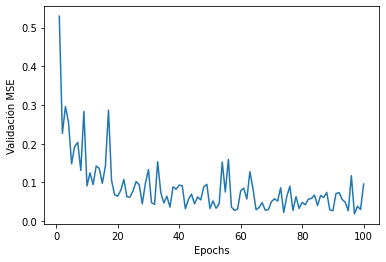

In [48]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

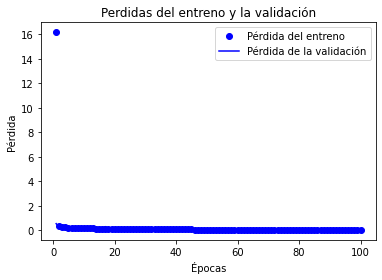

In [49]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Confrontamos en una gráfica las épocas contra la métrica de error absoluto medio (MAE)

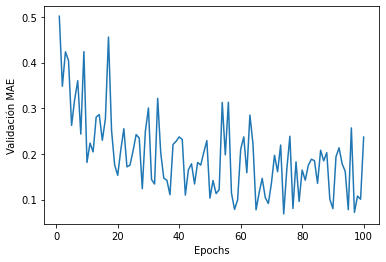

In [50]:
 import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

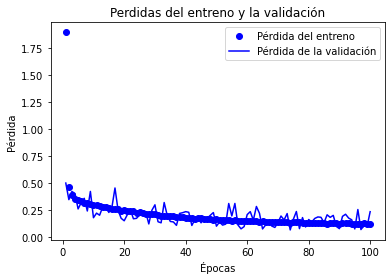

In [51]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [54]:
mymodel2 = build_model()

In [55]:
history = mymodel2.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=20, batch_size=128)

Epoch 1/20
391/391 [==============================] - 2s 4ms/step - loss: 13.7280 - mean_absolute_error: 1.7220 - val_loss: 1.1713 - val_mean_absolute_error: 0.8660
Epoch 2/20
391/391 [==============================] - 1s 4ms/step - loss: 0.3671 - mean_absolute_error: 0.4675 - val_loss: 0.2217 - val_mean_absolute_error: 0.3257
Epoch 3/20
391/391 [==============================] - 1s 4ms/step - loss: 0.2755 - mean_absolute_error: 0.4103 - val_loss: 0.2587 - val_mean_absolute_error: 0.3803
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2392 - mean_absolute_error: 0.3738 - val_loss: 0.2353 - val_mean_absolute_error: 0.3668
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 0.2152 - mean_absolute_error: 0.3557 - val_loss: 0.2552 - val_mean_absolute_error: 0.3877
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2010 - mean_absolute_error: 0.3408 - val_loss: 0.3099 - val_mean_absolute_error: 0.4783
Epoch 7/20
391/

In [56]:
mae_history = history.history['val_mean_absolute_error']
mse_history = history.history['val_loss']

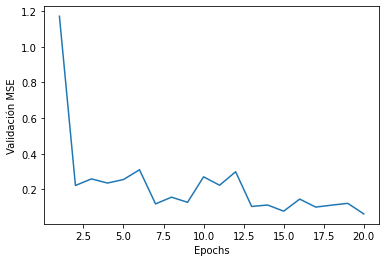

In [57]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

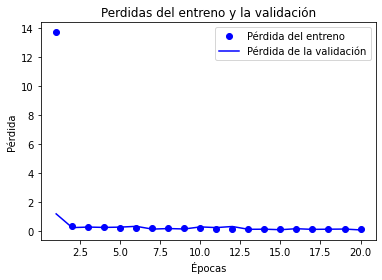

In [58]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

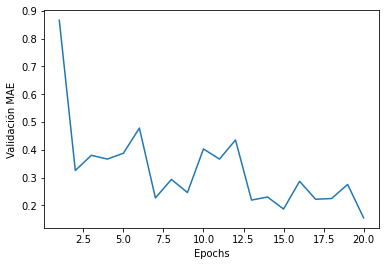

In [59]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

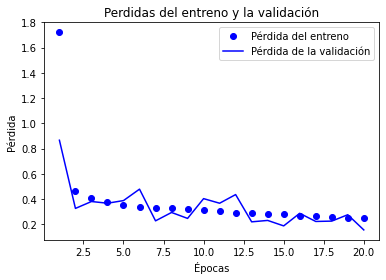

In [60]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [62]:
import numpy as np

# k= 4 particiones
k = 4
num_val_samples = len(partial_train_datos) // k # 404//4=101
print("num_val_samples", num_val_samples)
num_epochs = 30
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = partial_train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = partial_train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(partial_train_datos),"]")
    partial_train_data = np.concatenate(
        [partial_train_datos[:i * num_val_samples],
         partial_train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [partial_train_labels[:i * num_val_samples],
         partial_train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=128, verbose=0)
    # Evalua el modelo sobre los datos de validación
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 12500
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 12500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 12500 : 50000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 12500 : 25000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 12500 ]U[ 25000 : 50000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 25000 : 37500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 25000 ]U[ 37500 : 50000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 37500 : 50000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 37500 ]U[ 50000 : 50000 ]


In [63]:
all_scores

[0.22232098877429962,
 0.24478867650032043,
 0.16810421645641327,
 0.3730873465538025]

In [64]:
np.mean(all_scores)

0.25207530707120895

In [65]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [67]:
num_epochs = 60
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición # k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = partial_train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = partial_train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de todas la demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(partial_train_datos),"]")
    partial_train_data = np.concatenate(
        [partial_train_datos[:i * num_val_samples],
         partial_train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [partial_train_labels[:i * num_val_samples],
         partial_train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=128, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 12500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 12500 : 50000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 12500 : 25000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 12500 ]U[ 25000 : 50000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 25000 : 37500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 25000 ]U[ 37500 : 50000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 37500 : 50000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 37500 ]U[ 50000 : 50000 ]


In [68]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

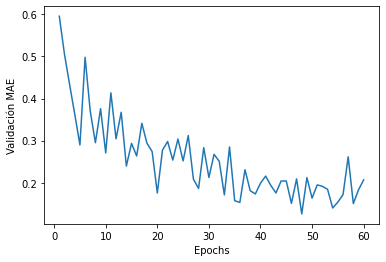

In [69]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

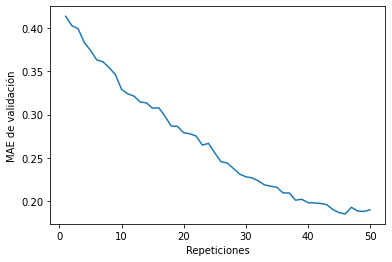

In [70]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

In [73]:
# Obtenemos un modelo compilado nuevo
model = build_model()
# Lo entrenamos en todos los datos.
model.fit(train_datos, train_labels,
          epochs=20, batch_size=128, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_datos, test_labels )

811/811 [==============================] - 1s 2ms/step - loss: 0.0920 - mean_absolute_error: 0.2431


In [74]:
test_mae_score

0.24309805035591125